In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import house_prices.feature_eng as fe
from utils.model_selection import select_model
from utils.plotter import plot_predict_accuracity, corr_plot
from utils.prediction import predict_model
from utils.submit import submit

f = "D:\\resources\\machineLearning\\python_test\\data\\house_price\\"
df_test = pd.read_csv(f + "test.csv")
df_train = pd.read_csv(f + "train.csv")

In [2]:
print("Total Rows train={0}".format(len(df_train.columns)))
print("Total Rows test={0}".format(len(df_test.columns)))
print("Train data len={0}".format(len(df_train)))

Total Rows train=81
Total Rows test=80
Train data len=1460


In [3]:
x_train, x_test, y_train, y_test = train_test_split(df_train.drop("SalePrice", axis=1),
                                                    df_train["SalePrice"],
                                                    test_size=0.33, random_state=42)

In [4]:
crl = x_train
crl["SalePrice"] = y_train

corr_values = fe.numeric_correlation(crl, "SalePrice")

In [5]:
x_train = fe.eng(x_train, corr_values)
x_test = fe.eng(x_test, corr_values)

In [7]:
res = select_model(x_train, y_train)
predict_model(res["clf"], x_test, y_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   16.2s finished


Best={'n_estimators': 19, 'min_samples_split': 4}, score=0.15768668260546273
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=19, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    2.8s finished


Best={'weights': 'distance', 'n_neighbors': 8}, score=0.22058775525572663
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='distance')


LinReg          0.311533
DecisionTree    0.220578
RandForest      0.157687
SVR             0.391781
KNeig           0.220588
Name: score_train, dtype: float64
Best clf=RandForest. rmse=0.15768668260546273
Test score=0.1560494069030002


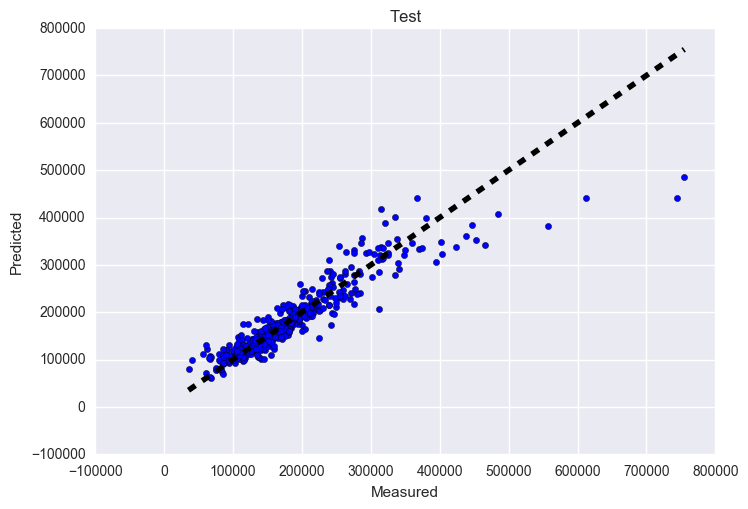

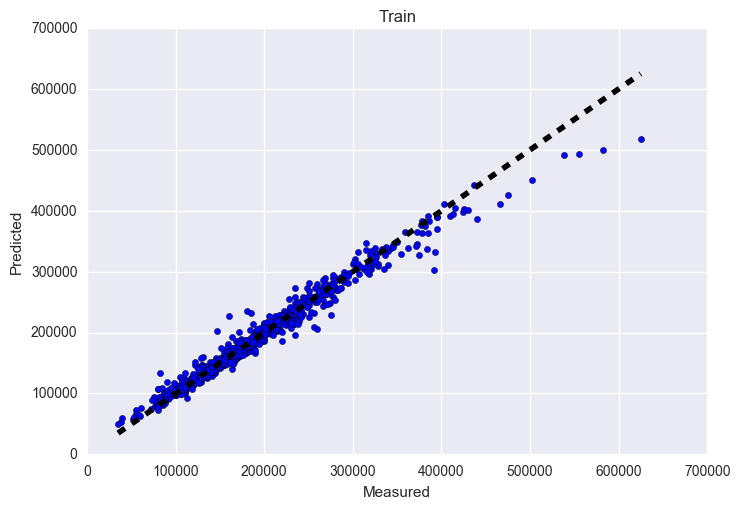

In [8]:
plot_predict_accuracity(res["clf"].predict(x_test), y_test, "Test")
plot_predict_accuracity(res["predict_train"], y_train, "Train")

In [9]:
x_super_test = fe.eng(df_test, corr_values)
super_result = res["clf"].predict(x_super_test)
submit(df_test["Id"], super_result, f, "Id", "SalePrice")